### Image classification "car/bike"

In [1]:
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

import os
from tqdm.autonotebook import tqdm, trange

import torch.nn as nn
import torch.optim as optim

import numpy as np
import torchvision
import matplotlib.pyplot as plt
import time

In [13]:
device = 'cpu'

### Data loaders

In [3]:

transform = transforms.Compose([
    transforms.Resize((227, 227)), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
train_dataset = datasets.ImageFolder(root='./dataset/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [4]:
class_names = train_dataset.classes

### Show image examples

$\text{normalized_image} = \dfrac{image - mean}{std}$

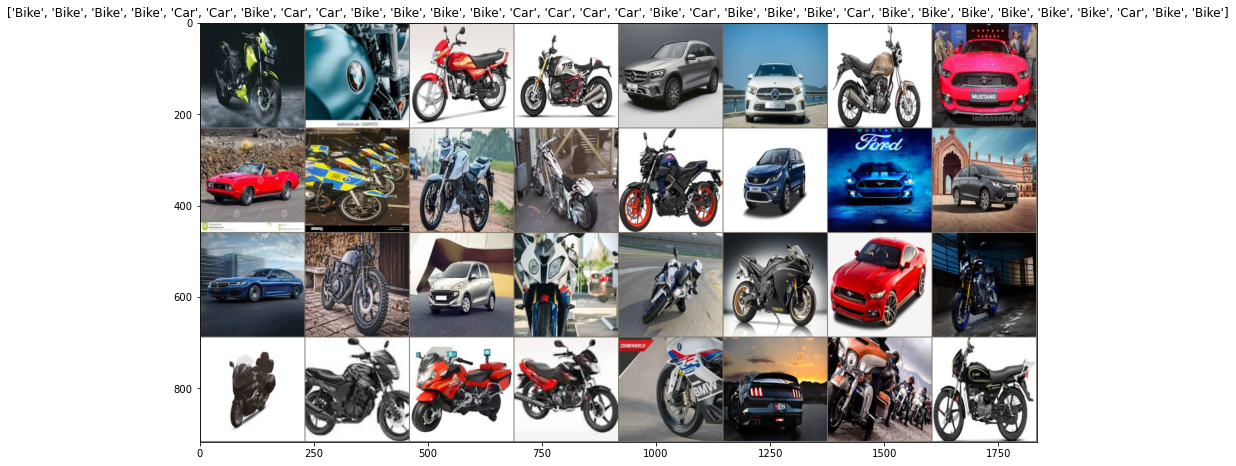

In [7]:
def imshow(inp, title):
    inp = inp.numpy().transpose((1, 2, 0))
    
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    inp = inp*std+mean
    
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(15, 12))
    plt.imshow(inp)
    
    plt.title(title)
    plt.pause(0.001)

inputs, classes = next(iter(train_loader))

out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

### Model

In [20]:
model = models.alexnet(True)

In [21]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [22]:
num_features = 9216
model.classifier = nn.Linear(num_features, 2)
loss_fn = nn.CrossEntropyLoss()
optimizer_ft = optim.Adam(model.parameters(), lr=0.0001)

In [23]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Linear(in_features=9216, out_features=2, bias=True)
)

In [24]:
model = model.to(device)

### Find the error in training loop below:

TODO

In [29]:
def train_model(model, criterion, optimizer, train_loader, num_epochs=25):
    since = time.time()   
    
    losses = []   
    pbar = trange(num_epochs, desc="Epoch:")   
    accs = []

    for epoch in pbar:  
        model.train()   
        running_loss = 0.0   
        running_corrects = 0   

        for data in tqdm(train_loader, leave=False, desc="train iter:"): 
            inputs, labels = data 
            inputs = inputs.to(device) 
            labels = labels.to(device)  

            optimizer.zero_grad()  
            outputs = model(inputs)  
            preds = torch.argmax(outputs, -1)   
            loss = criterion(outputs, labels)   
            loss.backward()   
            
            optimizer.step()  

            running_loss += loss.item() * inputs.size(0)   
            running_corrects += torch.sum(preds == labels.data)   

        epoch_loss = running_loss / len(train_loader.dataset)  
        epoch_acc = running_corrects.float() / len(train_loader.dataset)   
        losses.append(epoch_loss)  
        accs.append(epoch_acc)
        
        pbar.set_description(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')  

    time_elapsed = time.time() - since   
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')  

    return model, losses, accs  

In [32]:
model, losses, accs = train_model(model, loss_fn, optimizer_ft,train_loader, num_epochs=10)


Training complete in 11m 39s


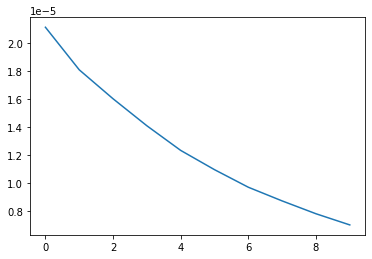

In [33]:
plt.plot(losses);

#### How to show accuracy???

TODO

## Test Images
---

In [34]:
from PIL import Image

### How to show class names instead of class number???

TODO

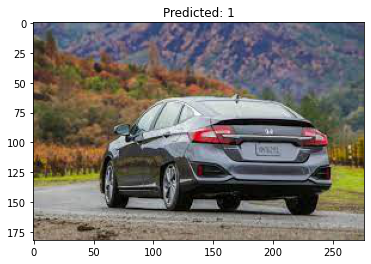

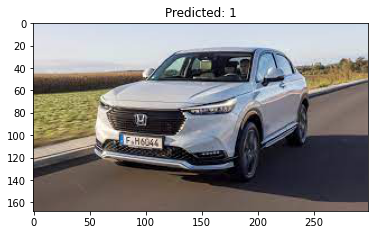

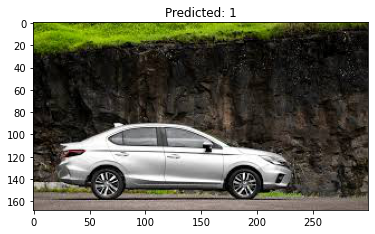

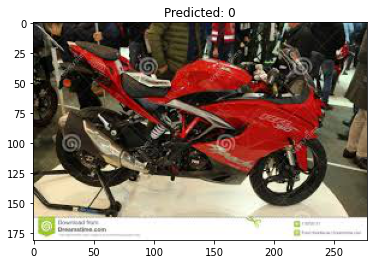

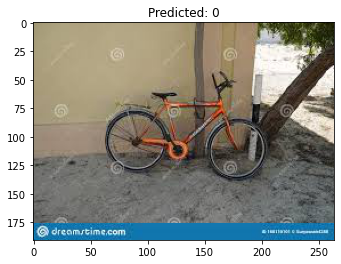

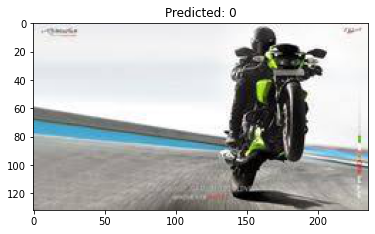

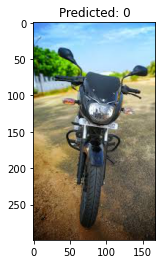

In [35]:
directory = './dataset/test'

for filename in os.listdir(directory):
    image_path = os.path.join(directory, filename)
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0)  
    
    image_tensor = image_tensor.to(device)
    with torch.no_grad():
        output = model(image_tensor)
        predicted = torch.argmax(output, dim=1)
    plt.imshow(image)
    plt.title(f'Predicted: {predicted.item()}')
    plt.show()